<a href="https://colab.research.google.com/github/Sneha1928/Prediction-using-Decision-Tree-Algorithm/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

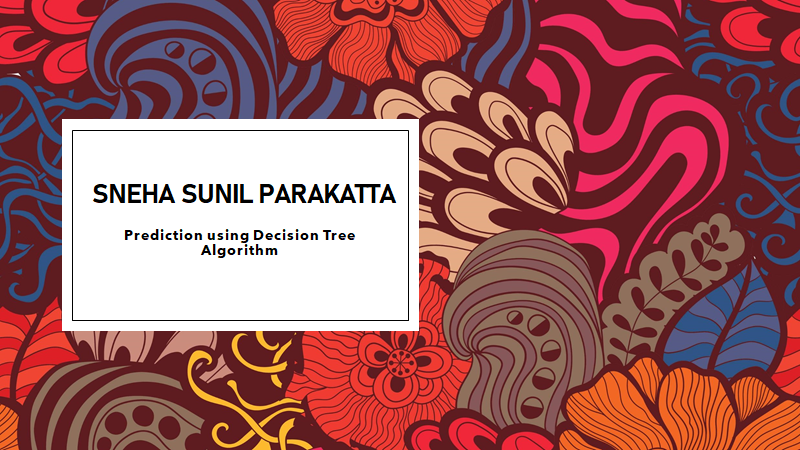

# Importing necessary libraries 

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import missingno

[Iris Dataset](https://drive.google.com/file/d/1mAT99ActSuHb-d6m2pxJUdXO1cqIIxDE/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/MY ML PROJECTS/Iris (1).csv",index_col="Id") # Considering Id as indexing column

## Problem Statement: Given the sepal length and width and petal length and width predict which species of iris is it.

Since the target variable consists of three classes hence its a classification problem.

So we can use any classification algorithm to build the model.

Here, I am using Decision Tree Algorithm to build the model.

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


We can see that there are four features and one target variables in which there are three classes.Proceeding with data pre-processing.

# Data preparation

Checking if there is any missing value. We can use missingno package to check number of missing value using a matrix. 

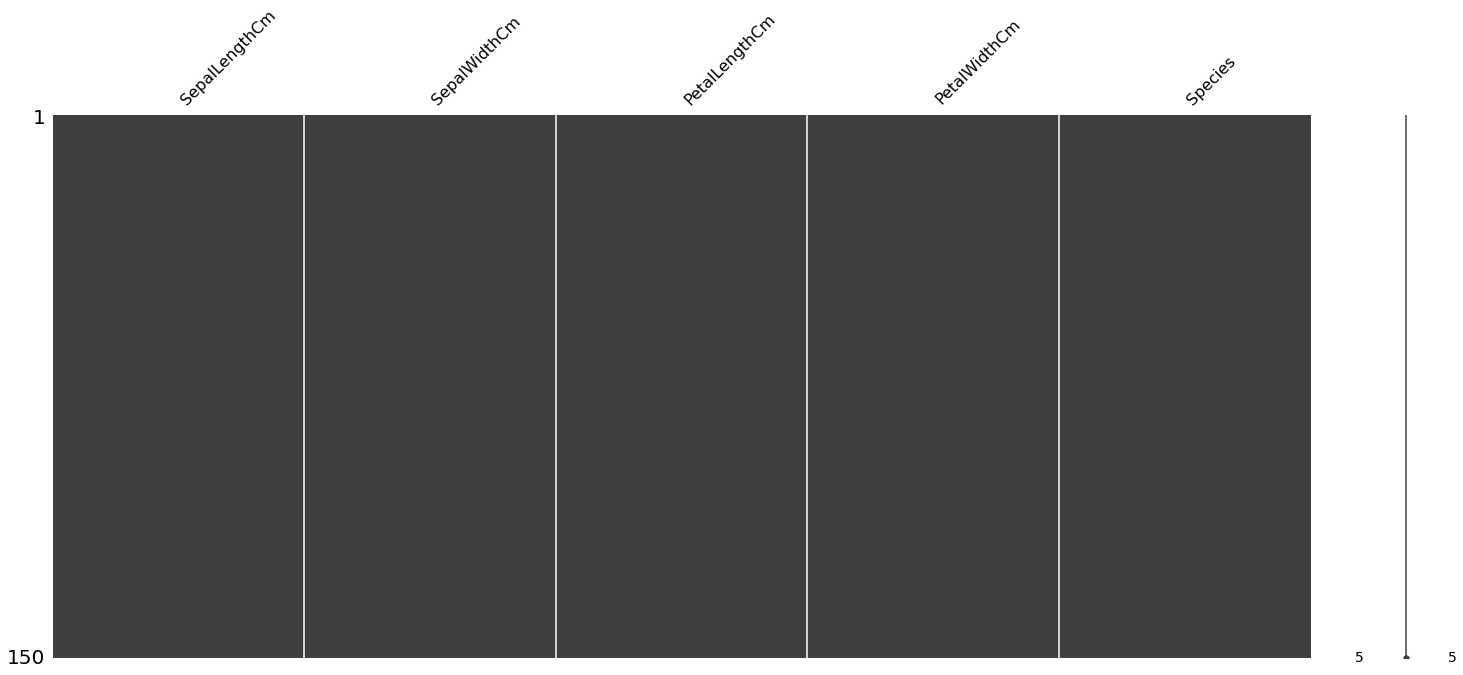

In [ ]:
missingno.matrix(data)

We can see that there are no missing value, hence, our data is clean

In [ ]:
x = data.drop(columns="Species")
y = data["Species"]

# Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0) # 80% training set

# Building the model

In [ ]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42) 
clf.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

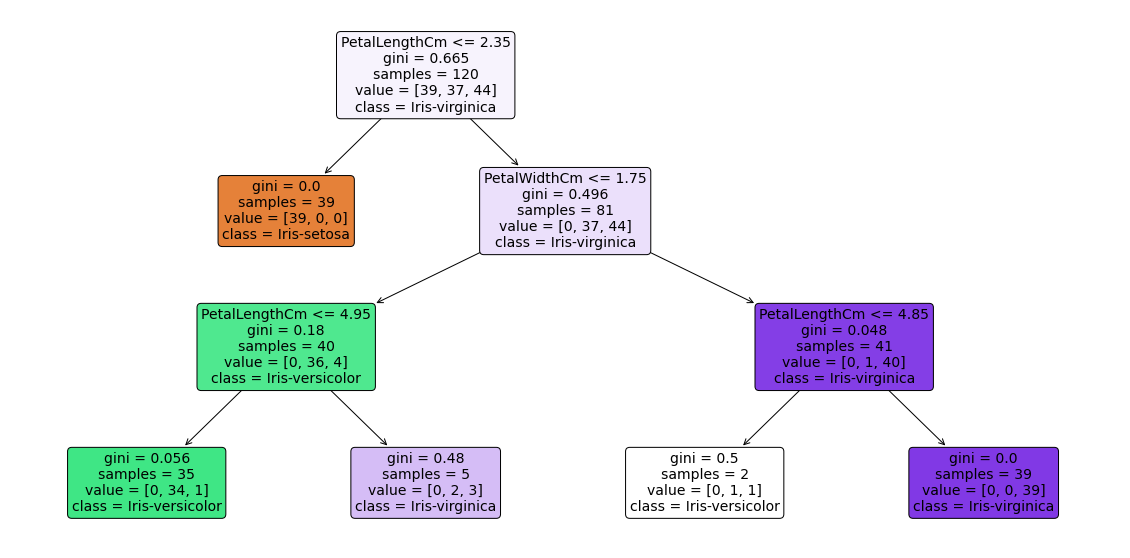

In [ ]:
from sklearn import tree
feature_names = x.columns
labels = y.unique()

plt.figure(figsize=(20,10))
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()


# Prediction

In [ ]:
predTrain = clf.predict(Xtrain)
predTest = clf.predict(Xtest)


# Evaluating the model

In [ ]:
CM_train = confusion_matrix(ytrain,predTrain)
print(CM_train)

[[39  0  0]
 [ 0 35  2]
 [ 0  2 42]]


In [ ]:
CM_test = confusion_matrix(ytest,predTest)
print(CM_test)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [ ]:
from sklearn import metrics
metrics.accuracy_score(ytest, predTest)

0.9666666666666667

In [ ]:
#get the precision score
precision = metrics.precision_score(ytest, predTest, average=None)
precision

array([1.        , 0.92857143, 1.        ])